# EECS 738 Final Project
### Data Exploration and Initial Modeling Strategies

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('../data/train.csv', engine='python')

In [3]:
df.head(4)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.0,Is this something I'll be able to install on m...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [4]:
# look at 75% of the data
df = df.sample(frac=0.5, replace=True, random_state=1)

In [5]:
# get rid of bad data
df = df.dropna()

In [6]:
# take a look
df.shape

(117290, 45)

In [7]:
# add some weak NLP stuff 
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df['comment_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [8]:
# split the data
import numpy as np
from sklearn.model_selection import train_test_split
labels = df['target']
tr = df.loc[:, df.columns != 'target']
tr = tr.loc[:, tr.columns != 'comment_text']
tr = tr.drop('created_date', axis = 1)
tr = tr.drop('rating', axis = 1)
tr = tr.drop('id', axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    tr, labels, test_size=0.5, random_state=42)

In [10]:
# set up decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt_regressor = DecisionTreeRegressor(random_state=0)

In [11]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [12]:
dt_scores = cross_val_score(dt_regressor, X_train, y_train, cv=10)

In [13]:
print("Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

Accuracy: 0.93 (+/- 0.01)


In [14]:
# set up generic linear regression
from sklearn.linear_model import LinearRegression

In [15]:
linreg = LinearRegression().fit(X_train, y_train)

In [16]:
linreg_scores = cross_val_score(linreg, X_test, y_test, cv=10)

In [17]:
print("Accuracy: %0.2f (+/- %0.2f)" % (linreg_scores.mean(), linreg_scores.std() * 2))

Accuracy: 0.92 (+/- 0.01)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

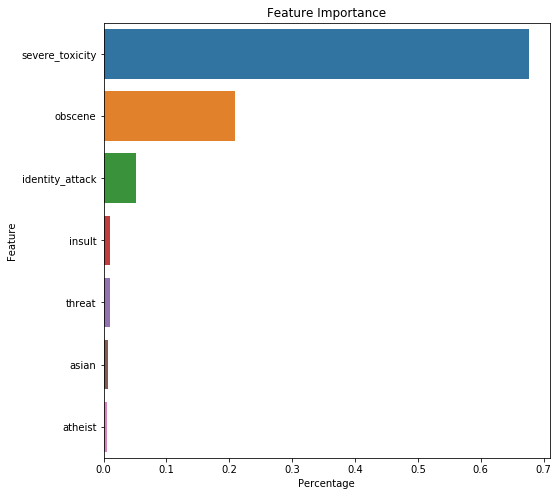

In [19]:
# check out feature importances
feats = {} 
for feature, importance in zip(X_train.columns, sorted(dt_regressor.feature_importances_, reverse=True)[:7]):
    feats[feature] = importance 

# graph
bar = pd.DataFrame.from_dict(feats, orient='index')
bar['index'] = bar.index.tolist()
plt.figure(figsize=(8,8))
ax = sns.barplot(x=0, y='index',data=bar)
ax.set(xlabel='Percentage', ylabel='Feature', title="Feature Importance")
plt.show()

Clearly, the most important feature was 'severe toxicity' 

The NLP engineered features don't really seem to be very important. It was worth a shot!